In [1]:
# import libraries needed
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
loan_dataset = pd.read_csv('data-t1.csv',low_memory = False)

In [3]:
# get first view about data
loan_dataset.head()

,loan_status,loan_amnt,int_rate,grade,emp_length,home_ownership,annual_inc,term
0,Current,2500,13.56,C,10+ years,RENT,55000,36 months
1,Current,30000,18.94,D,10+ years,MORTGAGE,90000,60 months
2,Current,5000,17.97,D,6 years,MORTGAGE,59280,36 months
3,Current,4000,18.94,D,10+ years,MORTGAGE,92000,36 months
4,Current,30000,16.14,C,10+ years,MORTGAGE,57250,60 months


In [4]:
loan_dataset.tail()

,loan_status,loan_amnt,int_rate,grade,emp_length,home_ownership,annual_inc,term
149994,Current,9000,11.55,B,10+ years,RENT,53000,36 months
149995,In Grace Period,7000,6.67,A,NaN,OWN,34000,36 months
149996,Current,25525,19.92,D,5 years,RENT,76000,36 months
149997,Late (31-120 days),25000,10.08,B,< 1 year,RENT,80000,60 months
149998,Current,18000,23.40,E,1 year,MORTGAGE,156000,36 months


In [5]:
loan_dataset.shape

(149999, 8)

In [6]:
loan_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149999 entries, 0 to 149998
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   loan_status     149999 non-null  object 
 1   loan_amnt       149999 non-null  int64  
 2   int_rate        149999 non-null  float64
 3   grade           149999 non-null  object 
 4   emp_length      136331 non-null  object 
 5   home_ownership  149998 non-null  object 
 6   annual_inc      149999 non-null  object 
 7   term            149999 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 5.7+ MB


In [7]:
loan_dataset.describe()

,loan_amnt,int_rate
count,149999.000000,149999.000000
mean,16020.048300,12.908296
std,10138.235301,5.127500
min,1000.000000,6.000000
25%,8000.000000,8.460000
50%,14000.000000,11.800000
75%,21987.500000,16.140000
max,40000.000000,30.990000


In [8]:
# Get started to do data preparation by checking null value in the dataset
loan_dataset.isnull().sum(axis = 0)

loan_status           0
loan_amnt             0
int_rate              0
grade                 0
emp_length        13668
home_ownership        1
annual_inc            0
term                  0
dtype: int64

In [9]:
# Change column emp_length and home_ownership null value to mode value of the column
loan_dataset['emp_length'].fillna(loan_dataset['emp_length'].mode()[0], inplace = True)
loan_dataset['home_ownership'].fillna(loan_dataset['home_ownership'].mode()[0], inplace = True)

In [10]:
# Check again if there is still null value in data
loan_dataset.isnull().sum(axis = 0)

loan_status       0
loan_amnt         0
int_rate          0
grade             0
emp_length        0
home_ownership    0
annual_inc        0
term              0
dtype: int64

In [11]:
# Check if there are any duplicate or incompatible data in the column
print(loan_dataset['home_ownership'].unique())
''' If we look deeper in the csv file, we can see that there is a pattern for some record error where data that should be on home_ownership gets into the annual_inc while data that's belong to home_ownership gets into the emp_length'''

['RENT' 'MORTGAGE' 'OWN' '4 years' '9 years' '10+ years' '1 year' 'ANY'
 '2 years' '3 years' '6 years' '7 years' '8 years' '5 years'
 ' Planning and Accountab"' '< 1 year' ' Events "' ' Regional Manager"'
 'MOTGAGE' ' Construction Supervisor"' ' GS 13-3"'
 ' Ethics and Compliance"' ' carpenter"' ' HR"' ' IT Mgr"' ' NC and TN"'
 ' Videographer"' ' and Communications "' ' and Implant Dentist"' ' cesc"'
 ' utah"' 'Server"' ' Sales"' ' Director of C"' 'MORGAGE' ' Supervisor"'
 'installation"' 'maintenance"' ' and Wellness"' ' "' ' security "'
 ' Associate Prof"' ' coach"' ' starbuck' ' Pension & Comp"'
 ' Brand Ambassador' '  Rare Disor"' ' store manager"' ' entertainer"'
 ' master tech"' ' welder"']


" If we look deeper in the csv file, we can see that there is a pattern for some record error where data that should be on home_ownership gets into the annual_inc while data that's belong to home_ownership gets into the emp_length"

In [12]:
# We want to clean this data
# Change typo into the correct value
loan_dataset.loc[loan_dataset['home_ownership'].str.contains('MOTGAGE|MORGAGE'), 'home_ownership'] = 'MORTGAGE'

# Transform data that 
loan_dataset.loc[~loan_dataset['home_ownership'].isin(['MORTGAGE','RENT','OWN','ANY']), 'home_ownership'] = loan_dataset['home_ownership'].mode()[0]

In [13]:
# Check home_ownership column again
loan_dataset['home_ownership'].unique()

array(['RENT', 'MORTGAGE', 'OWN', 'ANY'], dtype=object)

In [14]:
# Count Every data in the emp_length column
print(dict(loan_dataset['emp_length'].value_counts()))

{'10+ years': 58736, '< 1 year': 18326, '2 years': 12574, '3 years': 11701, '1 year': 10395, '5 years': 8985, '4 years': 8719, '6 years': 6288, '7 years': 5065, '8 years': 4742, '9 years': 3226, ' Business Development"': 19, ' Operations"': 17, ' Marketing"': 15, ' Human Resources"': 12, ' IT"': 11, ' Sales"': 9, ' Analytics"': 8, ' RN"': 7, ' Product Management"': 7, ' Senior"': 6, ' Client Services"': 5, ' VP"': 5, ' Lead"': 5, ' Digital Marketing"': 5, ' FP&A"': 5, ' Talent Acquisition"': 4, ' Principal"': 4, ' Sr."': 4, ' Finance"': 4, ' Sr"': 4, ' Information Technology"': 4, ' HR"': 4, ' Public Relations"': 3, ' Talent Development"': 3, ' Communications"': 3, ' Customer Service"': 3, ' AVP"': 3, ' North America"': 3, ' Human Resources "': 3, ' Professional Services"': 3, ' QA"': 2, ' Clinic Manager"': 2, ' North East"': 2, ' I.T."': 2, ' Application Development"': 2, ' Product Marketing"': 2, ' Business Operations"': 2, ' CPA"': 2, ' Program Management"': 2, ' Logistics Operation

In [15]:
# Because we are already handle the null value, we dont have to worry about it anymore
# We only want the "[...] years", so we can start from the first value until the 9 years value
loan_dataset = loan_dataset[loan_dataset.groupby('emp_length').emp_length.transform('count') > 3225]

In [16]:
# Check emp_length column
loan_dataset['emp_length'].unique()

array(['10+ years', '6 years', '4 years', '< 1 year', '2 years',
       '9 years', '5 years', '3 years', '7 years', '1 year', '8 years'],
      dtype=object)

In [17]:
loan_dataset['emp_length'] = loan_dataset['emp_length'].map(lambda x: x.rstrip('years'))

In [18]:
def categorizing_data(cell):
    if str(cell) == "10+ ":
        return "> 10"
    elif cell == "< 1 ":
        return "< 1"
    elif cell in ['1 ','2 ', '3 ', '4 ', '5 ']:
        return " 1-5"
    elif cell in ['6 ', '7 ', '8 ', '9 ']:
        return " 6-10"
    else:
        return "0"

loan_dataset['emp_length'] = loan_dataset.apply(lambda cell: categorizing_data(cell.emp_length), axis=1)

In [19]:
print(loan_dataset['emp_length'].unique())

['> 10' ' 6-10' ' 1-5' '< 1']


In [20]:
# Check another column (loan_status)
loan_dataset['loan_status'].unique()

array(['Current', 'Fully Paid', 'Late (31-120 days)', 'In Grace Period',
       'Charged Off', 'Late (16-30 days)', 'Fulli Paid', 'Full Paid',
       'Curren', 'Curent'], dtype=object)

In [21]:
loan_dataset.loc[loan_dataset['loan_status'].str.contains('Curren|Curent'), 'loan_status'] = 'Current'
loan_dataset.loc[loan_dataset['loan_status'].str.contains('Fulli Paid|Full Paid'), 'loan_status'] = 'Fully Paid'
loan_dataset.loc[loan_dataset['loan_status'].str.contains('Nov-18|Oct-18|Sep-18|Dec-18|3200'), 'loan_status'] = loan_dataset['loan_status'].mode()[0]

In [22]:
# Check result for loan_status
loan_dataset['loan_status'].unique()

array(['Current', 'Fully Paid', 'Late (31-120 days)', 'In Grace Period',
       'Charged Off', 'Late (16-30 days)'], dtype=object)

In [23]:
# Remove months from term column and change the column dtype
loan_dataset['term'] = loan_dataset['term'].map(lambda x: x.rstrip('months'))
loan_dataset['term'] = pd.to_numeric(loan_dataset['term'])

In [24]:
# Change annual_inc dtype
loan_dataset['annual_inc'] = pd.to_numeric(loan_dataset['annual_inc'])

In [25]:
print(loan_dataset.dtypes)

loan_status        object
loan_amnt           int64
int_rate          float64
grade              object
emp_length         object
home_ownership     object
annual_inc        float64
term                int64
dtype: object


In [26]:
# Check outlier data
Q1 = loan_dataset.quantile(0.25)
Q3 = loan_dataset.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

loan_amnt     13600.00
int_rate          7.68
annual_inc    51000.00
term             24.00
dtype: float64


In [28]:
# Clear outlier data from dataset
loan_dataset = loan_dataset[~((loan_dataset < (Q1 - 1.5 * IQR)) |(loan_dataset > (Q3 + 1.5 * IQR))).any(axis=1)]
loan_dataset.shape

(140206, 8)

In [29]:
# get view of data after cleansing
loan_dataset.head()

,loan_status,loan_amnt,int_rate,grade,emp_length,home_ownership,annual_inc,term
0,Current,2500,13.56,C,> 10,RENT,55000.0,36
1,Current,30000,18.94,D,> 10,MORTGAGE,90000.0,60
2,Current,5000,17.97,D,6-10,MORTGAGE,59280.0,36
3,Current,4000,18.94,D,> 10,MORTGAGE,92000.0,36
4,Current,30000,16.14,C,> 10,MORTGAGE,57250.0,60


In [30]:
loan_dataset.tail()

,loan_status,loan_amnt,int_rate,grade,emp_length,home_ownership,annual_inc,term
149994,Current,9000,11.55,B,> 10,RENT,53000.0,36
149995,In Grace Period,7000,6.67,A,> 10,OWN,34000.0,36
149996,Current,25525,19.92,D,1-5,RENT,76000.0,36
149997,Late (31-120 days),25000,10.08,B,< 1,RENT,80000.0,60
149998,Current,18000,23.40,E,1-5,MORTGAGE,156000.0,36


<function matplotlib.pyplot.show(*args, **kw)>

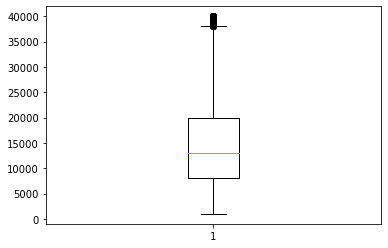

In [31]:
fig = plt.figure()
plt.boxplot(loan_dataset['loan_amnt'])
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

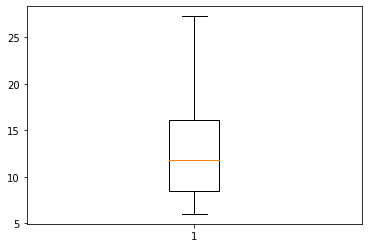

In [32]:
fig = plt.figure()
plt.boxplot(loan_dataset['int_rate'])
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

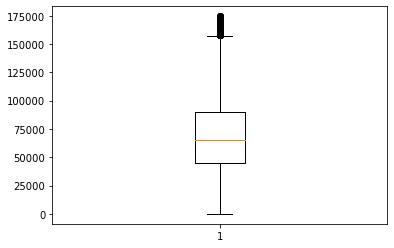

In [33]:
fig = plt.figure()
plt.boxplot(loan_dataset['annual_inc'])
plt.show       

<function matplotlib.pyplot.show(*args, **kw)>

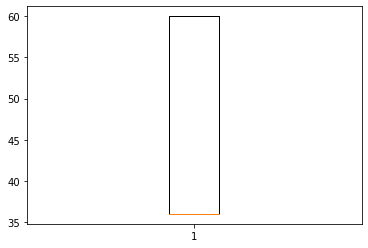

In [34]:
fig = plt.figure()
plt.boxplot(loan_dataset['term'])
plt.show

In [35]:
loan_dataset.to_csv('cleaned.csv', index = None, header = True)